# Homework 1

In [1]:
# imports
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

### 1.0

Create a Series with the temperature values for the last 14 days in Boston. Use the pandas 'date_range' function to create the index.

In [2]:
date_range = pd.date_range(end = dt.date(2024, 1, 22), periods=14, freq='D')
temperature_values = np.random.randint(50, 80, size=14)
temperature_series = pd.Series(temperature_values, index=date_range, name='Temperature')

temperature_series

2024-01-09    64
2024-01-10    50
2024-01-11    74
2024-01-12    61
2024-01-13    78
2024-01-14    74
2024-01-15    59
2024-01-16    70
2024-01-17    79
2024-01-18    70
2024-01-19    67
2024-01-20    67
2024-01-21    74
2024-01-22    61
Freq: D, Name: Temperature, dtype: int32

### 1.1

Filter out the values below the mean (of the Series created in 1.0)

In [3]:
mean_temperature = temperature_series.mean()
filtered_series = temperature_series[temperature_series >= mean_temperature]

filtered_series

2024-01-11    74
2024-01-13    78
2024-01-14    74
2024-01-16    70
2024-01-17    79
2024-01-18    70
2024-01-21    74
Name: Temperature, dtype: int32

### 1.2

Create a Series with the temperature values for every other day within the last 20 days in San Francisco.

In [4]:
date_range_sf = pd.date_range(end = dt.date(2024, 1, 22), periods=20, freq='D')
temperature_values_sf = np.random.randint(50, 80, size=20)
temperature_series_sf = pd.Series(temperature_values_sf, index=date_range_sf, name='Temperature')

temperature_series_sf = temperature_series_sf.iloc[-20::2]

temperature_series_sf

2024-01-03    63
2024-01-05    79
2024-01-07    72
2024-01-09    77
2024-01-11    74
2024-01-13    79
2024-01-15    76
2024-01-17    58
2024-01-19    68
2024-01-21    62
Freq: 2D, Name: Temperature, dtype: int32

### 1.3

Calculate the temperature difference between Boston (1.0) and San Francisco (1.2) per day. Programatically find the day with the highest difference. Fill in the blanks:

In [5]:
temperature_difference = temperature_series - temperature_series_sf
max_difference_day = temperature_difference.idxmax()
max_difference_value = temperature_difference.max()

print(f"The day with the highest temperature difference is {max_difference_day} with a difference of {max_difference_value} degrees.")

The day with the highest temperature difference is 2024-01-17 00:00:00 with a difference of 21.0 degrees.


### 1.4

Find the maximum and minimum temperatures for Boston and San Francisco. Fill in the blanks:

In [6]:
max_temperature_boston = temperature_series.max()
min_temperature_boston = temperature_series.min()

max_temperature_sf = temperature_series_sf.max()
min_temperature_sf = temperature_series_sf.min()

print(f"Maximum temperature in Boston: {max_temperature_boston} degrees")
print(f"Minimum temperature in Boston: {min_temperature_boston} degrees")

print(f"Maximum temperature in San Francisco: {max_temperature_sf} degrees")
print(f"Minimum temperature in San Francisco: {min_temperature_sf} degrees")

Maximum temperature in Boston: 79 degrees
Minimum temperature in Boston: 50 degrees
Maximum temperature in San Francisco: 79 degrees
Minimum temperature in San Francisco: 58 degrees


### 1.5

Plot the temperatures in Boston and San Francisco in one chart.

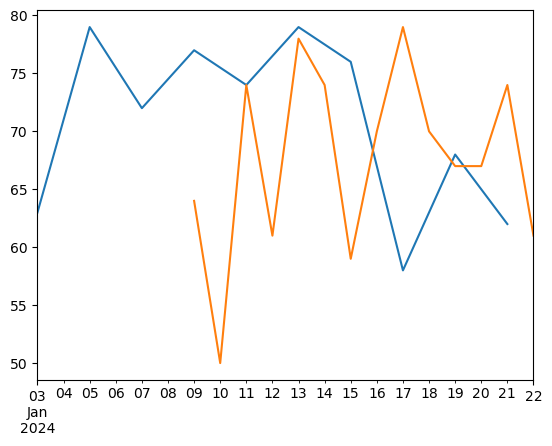

In [7]:
temperature_series_sf.plot() and temperature_series.plot();

### 2.1

Create a Dataframe with the names of your team members, their age, their favorite food, their favorite room temperature

In [8]:
data = {
    'Name': ['Gabriel', 'Mariana', 'Nimrod', 'Ruri', 'Rafael'],
    'Age': [25, 28, 24, 26, 27],
    'Favorite Food': ['Pizza', 'Pasta', 'Sushi', 'Soup', 'Salads'],
    'Favorite Room Temperature': [22, 20, 24, 21, 20]
}

team_df = pd.DataFrame(data)
team_df

,Name,Age,Favorite Food,Favorite Room Temperature
0,Gabriel,25,Pizza,22
1,Mariana,28,Pasta,20
2,Nimrod,24,Sushi,24
3,Ruri,26,Soup,21
4,Rafael,27,Salads,20


### 2.2

Filter the dataframe for only the two oldest team members

In [9]:
oldest_members_df = team_df.nlargest(2, 'Age')
oldest_members_df

,Name,Age,Favorite Food,Favorite Room Temperature
1,Mariana,28,Pasta,20
4,Rafael,27,Salads,20


### 2.3

Which team member is closest in favorite temperature to the 3rd percentil? Output his or her data.

In [10]:
third_percentile = team_df['Favorite Room Temperature'].quantile(0.03)
closest_member_df = team_df.iloc[(team_df['Favorite Room Temperature'] - third_percentile).abs().argsort()[:1]]
closest_member_df

,Name,Age,Favorite Food,Favorite Room Temperature
1,Mariana,28,Pasta,20


### 2.4

Get the 2nd and 3rd team members' favorite foods

In [11]:
selected_members_food = team_df.loc[1:2, 'Favorite Food']
selected_members_food

1    Pasta
2    Sushi
Name: Favorite Food, dtype: object

### 2.5

Add 2 degrees to the favorite room temperature of the oldest two team members

In [12]:
oldest_members_df = team_df.nlargest(2, 'Age')
oldest_members_df['Favorite Room Temperature'] = oldest_members_df['Favorite Room Temperature'].add(2)

team_df.update(oldest_members_df)
team_df

,Name,Age,Favorite Food,Favorite Room Temperature
0,Gabriel,25,Pizza,22
1,Mariana,28,Pasta,22
2,Nimrod,24,Sushi,24
3,Ruri,26,Soup,21
4,Rafael,27,Salads,22


## 3.0

Load the coaster_db.csv dataset

In [13]:
from pathlib import Path

In [14]:
cwd = Path.cwd()
cwd

WindowsPath('C:/Users/gabch/Documents/HULT/MBAN/Courses/2nd Semester/Computational Data Analytics with Python/Homework 1')

In [15]:
datapath = cwd.joinpath(Path('data'))
datapath

WindowsPath('C:/Users/gabch/Documents/HULT/MBAN/Courses/2nd Semester/Computational Data Analytics with Python/Homework 1/data')

In [16]:
coaster_df = datapath.joinpath(Path('coaster_db.csv'))
coaster_df

WindowsPath('C:/Users/gabch/Documents/HULT/MBAN/Courses/2nd Semester/Computational Data Analytics with Python/Homework 1/data/coaster_db.csv')

In [17]:
path = Path('data').joinpath(Path('coaster_db.csv'))
coaster_df = pd.read_csv(path, low_memory=False)

In [18]:
print(f"Filename: {path.name}")
print(f"Filename w/o extension: {path.stem}")
print(f"Extension: {path.suffix}")
print(f"Root: {path.anchor}")
print(f"Parent: {path.parent}")

Filename: coaster_db.csv
Filename w/o extension: coaster_db
Extension: .csv
Root: 
Parent: data


In [19]:
coaster_df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [20]:
coaster_df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


## 3.1
Store the coaster dataset in a new database. Ensure to handle duplicate column names.

In [21]:
import sqlite3

def make_unique_columns(df):
    seen_cols = set()
    new_cols = []
    for col in df.columns:
        new_col = col
        i = 1
        while new_col in seen_cols:
            new_col = f"{col}_{i}"
            i += 1
        seen_cols.add(new_col)
        new_cols.append(new_col)
    df.columns = new_cols

data_path = Path.cwd().joinpath('data')
db_path = data_path.joinpath('coaster.db')
file_path = data_path.joinpath('coaster_db.csv')

# Read CSV and apply make_unique_columns
coaster_df = pd.read_csv(file_path, low_memory=False)
make_unique_columns(coaster_df)

coaster_df.columns = [f'col_{i}' for i in range(1, len(coaster_df.columns) + 1)]

# Store the DataFrame in the SQLite database
with sqlite3.connect(db_path) as connection:
    coaster_df.to_sql(name='coaster', con=connection, index=False, if_exists='replace')

In [22]:
coaster_df.columns

Index(['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8',
       'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15',
       'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22',
       'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29',
       'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36',
       'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42', 'col_43',
       'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49', 'col_50',
       'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56'],
      dtype='object')

In [23]:
# Assigning the original names
original_column_names = ['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
                          'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
                          'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
                          'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
                          'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
                          'Track layout', 'Fastrack available', 'Soft opening date.1',
                          'Closing date', 'Opened', 'Replaced by', 'Website',
                          'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
                          'Single rider line available', 'Restraint Style',
                          'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
                          'year_introduced', 'latitude', 'longitude', 'Type_Main',
                          'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
                          'speed_mph', 'height_value', 'height_unit', 'height_ft',
                          'Inversions_clean', 'Gforce_clean']

# Create a mapping dictionary
column_mapping = {f'col_{i}': original_column_names[i-1] for i in range(1, 57)}

# Rename columns using the mapping
coaster_df.rename(columns=column_mapping, inplace=True)
coaster_df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [24]:
coaster_df.head(20)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,...,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60.0,ft,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [25]:
coaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

## 4.0

Clean the dataset coaster dataset.

- Ensure all columns only have one unit
- Ensure dates are as datetime
- Ensure boolean information is stored as boolean
- Only retain the following columns:
    - coaster_name
    - Length
    - Speed
    - Location
    - Status
    - Manufacturer
    - Height
    - Designer
    - Track layout
    - latitude
    - longitude
    - opening_date_clean
    - speed_mph
    - height_value
- Ensure the column names are descriptive, contain no blank spaces and have the same capitalization

In [26]:
coaster_df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [27]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)
coaster_df.head(10)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,40 ft (12 m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,41 ft (12 m),NaN,NaN,NaN,NaN,NaN,1:00,NaN,NaN,Edward Joy Morris,25°,9 ft (2.7 m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,Wood,1902-01-01,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1904,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,NaN,60 ft (18 m),NaN,NaN,NaN,NaN,NaN,1 minute 30 seconds,NaN,NaN,"Christopher Feucht, Welcome Mosley",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,40.5744,-73.9786,Other,1907-06-06,NaN,NaN,NaN,NaN,NaN,60.0,ft,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,41.58

In [28]:
# Check for missing values in 'Length' column
missing_length_values = coaster_df['Length'].isnull()

# Convert 'Length' to string to handle potential non-string values
coaster_df['Length'] = coaster_df['Length'].astype(str)

# Extract numerical values and units for feet and meters
length_extracted = coaster_df['Length'].str.extract(r'(?P<feet>\d+)\s*ft.*?\((?P<meters>\d+)\s*m\)')

# Convert columns to numeric
length_extracted['feet'] = pd.to_numeric(length_extracted['feet'])
length_extracted['meters'] = pd.to_numeric(length_extracted['meters'])

# Add new columns to the original DataFrame
coaster_df[['Length (ft)', 'Length (m)']] = length_extracted[['feet', 'meters']]
coaster_df

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean,Length (ft),Length (m)
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9,600.0,180.0
1,Flip Flap Railway,nan,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0,NaN,NaN
2,Switchback Railway (Euclid Beach Park),nan,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,Loop the Loop (Coney Island),nan,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
4,Loop the Loop (Young's Pier),nan,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),3.0,Booster Wheel Lift Hill,NaN,3 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,"1,500 riders per hour",4.7,Werner Stengel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7,NaN,NaN
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),2.0,LSM,NaN,2 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,NaN,NaN,NaN,95°,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN,NaN,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),0.0,LIM Launch,NaN,7 trains with 7 cars. Riders are arranged 2 ac...,NaN,~2:00,"1,680 riders per hour",4,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transf

In [29]:
coaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         1087 non-null   object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [30]:
# Convert 'Speed' to mph
coaster_df['Speed'] = coaster_df['speed1_value'] * 0.621371 

In [31]:
# Ensure dates are as datetime
coaster_df['opening_date_clean'] = pd.to_datetime(coaster_df['opening_date_clean'])

In [32]:
# List of columns to convert to boolean
boolean_columns = ['Inversions', 'Fast Lane available', 'Fastrack available', 'Flash Pass Available',
                   'Must transfer from wheelchair', 'Single rider line available', 'Flash Pass available',
                   'Inversions_clean']

# Convert relevant columns to boolean type
coaster_df[boolean_columns] = coaster_df[boolean_columns].replace({'Yes': True, 'No': False, 'TRUE': True, 'FALSE': False,
                                                                   'True': True, 'False': False, 'true': True, 'false': False})

# Ensure boolean columns are as boolean type
coaster_df[boolean_columns] = coaster_df[boolean_columns].astype(bool)

In [33]:
# Convert 'Cost' column to numeric
coaster_df['Cost'] = pd.to_numeric(coaster_df['Cost'], errors='coerce')
coaster_df.dtypes

coaster_name                             object
Length                                   object
Speed                                   float64
Location                                 object
Status                                   object
Opening date                             object
Type                                     object
Manufacturer                             object
Height restriction                       object
Model                                    object
Height                                   object
Inversions                                 bool
Lift/launch system                       object
Cost                                    float64
Trains                                   object
Park section                             object
Duration                                 object
Capacity                                 object
G-force                                  object
Designer                                 object
Max vertical angle                      

In [34]:
# Define a dictionary with column names and their corresponding data types
data_types = {
    'Length': float,
    'Speed': float,
    'Height': float,
    'Inversions': float,
    'Cost': float,
    'Capacity': float,
    'G-force': float,
    'Max vertical angle': float,
    'Drop': float,
    'Acceleration': float,
    'speed1_value': float,
    'speed_mph': float,
    'height_value': float,
    'height_ft': float,
    'year_introduced': int,
    'latitude': float,
    'longitude': float,
    'Inversions_clean': int,
    'Gforce_clean': float,
    'Length (ft)': float,
    'Length (m)': float
}

# Convert columns to their specified data types
coaster_df = coaster_df.astype(data_types, errors='ignore')
coaster_df.dtypes

coaster_name                             object
Length                                   object
Speed                                   float64
Location                                 object
Status                                   object
Opening date                             object
Type                                     object
Manufacturer                             object
Height restriction                       object
Model                                    object
Height                                   object
Inversions                              float64
Lift/launch system                       object
Cost                                    float64
Trains                                   object
Park section                             object
Duration                                 object
Capacity                                 object
G-force                                  object
Designer                                 object
Max vertical angle                      

In [35]:
selected_columns = [
    'coaster_name', 'Length (ft)', 'Speed', 'Location', 'Status', 
    'Manufacturer', 'Height', 'Designer', 'Track layout', 
    'latitude', 'longitude', 'opening_date_clean', 
    'speed_mph', 'height_value'
]

coaster2_df = coaster_df[selected_columns]

In [36]:
# Ensure the column names are descriptive, contain no blank spaces and have the same capitalization
coaster2_df.columns = [
    'Coaster Name', 'Length', 'Speed', 'Location', 'Status', 
    'Manufacturer', 'Height', 'Designer', 'Track Layout', 
    'Latitude', 'Longitude', 'Opening Date', 
    'Speed (mph)', 'Height (m)']

In [37]:
coaster2_df.columns

Index(['Coaster Name', 'Length', 'Speed', 'Location', 'Status', 'Manufacturer',
       'Height', 'Designer', 'Track Layout', 'Latitude', 'Longitude',
       'Opening Date', 'Speed (mph)', 'Height (m)'],
      dtype='object')

## 4.1

Add a column giving the average speed per height

In [38]:
coaster2_df['Avg Speed per Height'] = coaster2_df['Speed (mph)'] / coaster2_df['Height (m)']
coaster2_df

,Coaster Name,Length,Speed,Location,Status,Manufacturer,Height,Designer,Track Layout,Latitude,Longitude,Opening Date,Speed (mph),Height (m),Avg Speed per Height
0,Switchback Railway,600.0,3.728226,Coney Island,Removed,LaMarcus Adna Thompson,50 ft (15 m),LaMarcus Adna Thompson,Gravity pulled coaster,40.5740,-73.9780,1884-06-16,6.0,50.0,0.120000
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,Lina Beecher,NaN,Lina Beecher,NaN,40.5780,-73.9790,1895-01-01,NaN,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,NaN,NaN,NaN,41.5800,-81.5700,NaT,NaN,NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,Edwin Prescott,NaN,Edward A. Green,NaN,40.5745,-73.9780,1901-01-01,NaN,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,Edwin Prescott,NaN,Edward A. Green,NaN,39.3538,-74.4342,1901-01-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,NaN,32.932663,Other,NaN,Anton Schwarzkopf,111 ft (34 m),Werner Stengel,NaN,NaN,NaN,NaT,53.0,111.0,0.477477
1083,Pantheon (roller coaster),NaN,45.360083,Busch Gardens Williamsburg,Under construction,Intamin,178 ft (54 m),NaN,NaN,37.2339,-76.6426,2022-01-01,73.0,178.0,0.410112
1084,Tron Lightcycle Power Run,NaN,36.847300,Other,NaN,Vekoma,78.1 ft (23.8 m),Walt Disney Imagineering,NaN,NaN,NaN,2016-06-16,59.3,78.1,0.759283
1085,Tumbili,770.0,21.126614,Kings Dominion,Under construction,S&S – Sansei Technologies,112 ft (34 m),NaN,NaN,NaN,NaN,NaT,34.0,112.0,0.303571


In [39]:
coaster2_df.columns

Index(['Coaster Name', 'Length', 'Speed', 'Location', 'Status', 'Manufacturer',
       'Height', 'Designer', 'Track Layout', 'Latitude', 'Longitude',
       'Opening Date', 'Speed (mph)', 'Height (m)', 'Avg Speed per Height'],
      dtype='object')

## 4.2
Find the total number of empty values

In [40]:
total_missing_values = coaster2_df.isna().sum().sum()
print(f'Total number of missing values: {total_missing_values}')

Total number of missing values: 3713


## 4.3
Find the duplicated coasters and remove them

In [41]:
duplicated_coasters = coaster2_df[coaster2_df.duplicated(subset='Coaster Name', keep=False)]

coaster2_df = coaster2_df.drop_duplicates(subset='Coaster Name', keep='first')

coaster2_df = coaster2_df.reset_index(drop=True)

## 4.4
What is the average coaster length per decade?

In [42]:
# Ensure 'Opening Date' is in datetime format
coaster2_df['Opening Date'] = pd.to_datetime(coaster2_df['Opening Date'], errors='coerce')

# Convert 'Length' to numeric after ensuring it's in a consistent unit
coaster2_df['Length'] = pd.to_numeric(coaster2_df['Length'], errors='coerce')

# Extract the decade from 'Opening Date'
coaster2_df['Decade'] = (coaster2_df['Opening Date'].dt.year // 10) * 10

# Calculate the average coaster length per decade
average_length_per_decade = coaster2_df.groupby('Decade')['Length'].mean()
average_length_per_decade

Decade
1880.0    600.000000
1890.0           NaN
1900.0    452.000000
1910.0    380.000000
1920.0    470.250000
1930.0    697.666667
1940.0    510.000000
1950.0    385.200000
1960.0    423.000000
1970.0    462.694444
1980.0    470.310345
1990.0    517.550000
2000.0    440.063291
2010.0    401.465517
2020.0    563.666667
Name: Length, dtype: float64

## 4.5
Find the median speed per Designer

In [43]:
# Ensure 'Speed' is in numeric format
coaster2_df['Speed'] = pd.to_numeric(coaster2_df['Speed'], errors='coerce')

# Group by 'Designer' and calculate the median speed
median_speed_per_designer = coaster2_df.groupby('Designer')['Speed'].median()
median_speed_per_designer

Designer
Al CollinsJeff Gramke                              40.252413
Alan Schilke                                       34.796776
Alan SchilkeRenato Manzoni                         47.224196
Alison Brittle, Eden Carpenter, and Gary Norton    31.068550
Andy Vettel (1968)John A. Miller (1924)            34.175405
                                                     ...    
Werner Stengel[3]                                  91.962908
William Cobb                                       36.039518
William Cobb & Associates                          37.095849
William CobbWerner Stengel                         38.587139
Zierer                                             13.918710
Name: Speed, Length: 153, dtype: float64

## 4.6
What is the active coaster length per location? Sort high-to-low.

In [44]:
# Filter out rows where 'Status' is not 'Operating'
active_coasters_df = coaster2_df[coaster2_df['Status'] == 'Operating']

# Calculate the total length of active coasters per location
active_coaster_length_per_location = active_coasters_df.groupby('Location')['Length'].sum()

# Sort the result in descending order
sorted_active_coaster_length = active_coaster_length_per_location.sort_values(ascending=False)
sorted_active_coaster_length

Location
Hersheypark                   5045.0
Kings Island                  3806.0
California's Great America    3347.0
Valleyfair                    3347.0
Adventureland (Iowa)          3331.0
                               ...  
Dam Sen Cultural Park            0.0
Disney's Animal Kingdom          0.0
Adventure City                   0.0
La Ronde                         0.0
Đại Nam Văn Hiến                 0.0
Name: Length, Length: 222, dtype: float64

## 4.7
Which manufaturer had the heighest active amount of coaster length each decade?

In [45]:
# Filter out rows where 'Status' is not 'Operating'
active_coasters_df = coaster2_df[coaster2_df['Status'] == 'Operating']

# Calculate the total coaster length per manufacturer and decade for active coasters
total_length_per_manufacturer_decade = active_coasters_df.groupby(['Decade', 'Manufacturer'])['Length'].sum()

# Find the manufacturer with the highest total coaster length in each decade
manufacturer_with_highest_length_each_decade = total_length_per_manufacturer_decade.groupby('Decade').idxmax().apply(lambda x: x[1])
manufacturer_with_highest_length_each_decade

Decade
1900.0      Federal Construction Company
1910.0                 LaMarcus Thompson
1920.0    Philadelphia Toboggan Coasters
1930.0    Philadelphia Toboggan Coasters
1940.0                Joseph E. Drambour
1950.0    Philadelphia Toboggan Coasters
1960.0    Philadelphia Toboggan Coasters
1970.0    Philadelphia Toboggan Coasters
1980.0                    Arrow Dynamics
1990.0     Custom Coasters International
2000.0                            Vekoma
2010.0       Rocky Mountain Construction
2020.0       Rocky Mountain Construction
Name: Length, dtype: object

## 4.8
What is the favorite track layout and how does it change over time? Show in a plot. Which layout is most expensive?

In [46]:
# Find all track layouts and their frequencies
track_layout_counts = coaster2_df['Track Layout'].value_counts()
track_layout_counts

Track Layout
Terrain                            42
Twister                            39
Out and Back                       27
Out and back                       24
Custom                             23
                                   ..
Bobsled                             1
Indoor Twister                      1
Double Out and back Figure 8[1]     1
Boomerang                           1
Terrain[2]                          1
Name: count, Length: 95, dtype: int64

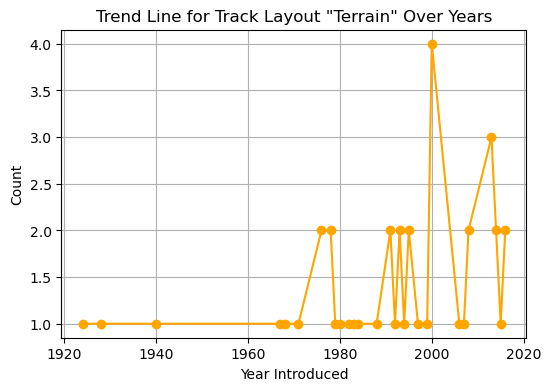

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the track layout "Terrain"
terrain_data = coaster_df[coaster_df['Track layout'] == 'Terrain']

# Group by 'year_introduced' and count the occurrences
terrain_counts_by_year = terrain_data.groupby('year_introduced').size().reset_index(name='Count')

# Plotting the trend line for the track layout "Terrain"
plt.figure(figsize=(6, 4))
plt.plot(terrain_counts_by_year['year_introduced'], terrain_counts_by_year['Count'], marker='o', linestyle='-', color='orange')
plt.title('Trend Line for Track Layout "Terrain" Over Years')
plt.xlabel('Year Introduced')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [48]:
column_name = 'Cost'

# Get unique values in the specified column
unique_values = coaster_df[column_name].unique()
unique_values

array([nan])

### Which layout is the most expensive?

 The cleaning of the data is quite hard since the 'cost' data is very messed up with a lot of different issues e.g. dollar signs, text, different symbols, different currencies etc. 
 In fact, the answer to this question is impossible regarding the data provided.

## 5.0
Using the earthquake data: Which coaster was closest to an earthquake that happened in the last 90 days?

- load the earthquake data
- calculate the distances as:
    - distance = square root((Latitude1 - Latitude2) **2 + (Longitude1 - Longitude2) **2)
- Print the coaster information and how far away it was from the closes earthquake

In [49]:
cwd = Path.cwd()
cwd

WindowsPath('C:/Users/gabch/Documents/HULT/MBAN/Courses/2nd Semester/Computational Data Analytics with Python/Homework 1')

In [50]:
datapath = cwd.joinpath(Path('data'))
datapath

WindowsPath('C:/Users/gabch/Documents/HULT/MBAN/Courses/2nd Semester/Computational Data Analytics with Python/Homework 1/data')

In [51]:
eq_df = datapath.joinpath(Path('earthquake.csv'))
eq_df

WindowsPath('C:/Users/gabch/Documents/HULT/MBAN/Courses/2nd Semester/Computational Data Analytics with Python/Homework 1/data/earthquake.csv')

In [52]:
path = Path('data').joinpath(Path('earthquake.csv'))
eq_df = pd.read_csv(path, low_memory=False)

In [53]:
print(f"Filename: {path.name}")
print(f"Filename w/o extension: {path.stem}")
print(f"Extension: {path.suffix}")
print(f"Root: {path.anchor}")
print(f"Parent: {path.parent}")

Filename: earthquake.csv
Filename w/o extension: earthquake
Extension: .csv
Root: 
Parent: data


In [54]:
eq_df.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [55]:
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9332 entries, 0 to 9331
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mag           9331 non-null   float64
 1   magType       9331 non-null   object 
 2   time          9332 non-null   int64  
 3   place         9332 non-null   object 
 4   tsunami       9332 non-null   int64  
 5   parsed_place  9332 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 437.6+ KB


In [56]:
import requests

yesterday = dt.date.today() - dt.timedelta(days=1)

api = 'https://earthquake.usgs.gov/fdsnws/event/1/query'

payload = {
    'format': 'geojson', 
    'starttime': yesterday - dt.timedelta(days=30), 
    'endtime': yesterday
}

response = requests.get(api, params=payload)

In [57]:
response.status_code

200

In [58]:
quake_json = response.json()
quake_json.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [59]:
quake_json['metadata']

{'generated': 1706295964000,
 'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2023-12-26&endtime=2024-01-25',
 'title': 'USGS Earthquakes',
 'status': 200,
 'api': '1.14.0',
 'count': 9564}

In [60]:
quake_json['features'][0]

{'type': 'Feature',
 'properties': {'mag': 1.4,
  'place': '23 km W of Salamatof, Alaska',
  'time': 1706140754297,
  'updated': 1706140924108,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak024142xz45',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ak024142xz45&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'automatic',
  'tsunami': 0,
  'sig': 30,
  'net': 'ak',
  'code': '024142xz45',
  'ids': ',ak024142xz45,',
  'sources': ',ak,',
  'types': ',origin,phase-data,',
  'nst': None,
  'dmin': None,
  'rms': 0.65,
  'gap': None,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 1.4 - 23 km W of Salamatof, Alaska'},
 'geometry': {'type': 'Point', 'coordinates': [-151.7467, 60.6547, 62.7]},
 'id': 'ak024142xz45'}

In [61]:
eq_df.shape

(9332, 6)

In [62]:
# Assuming 'features' is a list of dictionaries
features = quake_json['features']

# Initialize empty lists to store place and coordinates
places = []
coordinates = []

# Iterate over each feature and extract 'place' and 'coordinates'
for feature in features:
    place = feature['properties']['place']
    coord = feature['geometry']['coordinates']
    coordinates.append(coord)
    places.append(place)

quake_df = pd.DataFrame({'place': places, 'coordinates': coordinates})
quake_df

,place,coordinates
0,"23 km W of Salamatof, Alaska","[-151.7467, 60.6547, 62.7]"
1,"21 km NNW of Chickaloon, Alaska","[-148.5582, 61.9877, 23]"
2,"14 km SE of Lindsay, Texas","[-103.417, 31.297, 6.1573]"
3,"56 km S of Whites City, New Mexico","[-104.339, 31.671, 6.183]"
4,"9 km WNW of Cobb, CA","[-122.8236694, 38.840332, 1.79]"
...,...,...
9559,"87 km WNW of Yakutat, Alaska","[-141.0264, 59.9868, 1.7]"
9560,"101 km SSE of Atka, Alaska","[-173.5429, 51.3837, 35]"
9561,"46 km E of Denali National Park, Alaska","[-150.791, 63.5523, 9.9]"
9562,"4 km NNW of Lake Henshaw, CA","[-116.7778333, 33.2711667, 12.4]"


In [63]:
# Split 'coordinates' column into separate columns
quake_df[['longitude', 'latitude', 'depth']] = pd.DataFrame(quake_df['coordinates'].tolist(), index=quake_df.index)

# Drop the original 'coordinates' column
quake_df.drop(columns=['coordinates'], inplace=True)
quake_df

,place,longitude,latitude,depth
0,"23 km W of Salamatof, Alaska",-151.746700,60.654700,62.7000
1,"21 km NNW of Chickaloon, Alaska",-148.558200,61.987700,23.0000
2,"14 km SE of Lindsay, Texas",-103.417000,31.297000,6.1573
3,"56 km S of Whites City, New Mexico",-104.339000,31.671000,6.1830
4,"9 km WNW of Cobb, CA",-122.823669,38.840332,1.7900
...,...,...,...,...
9559,"87 km WNW of Yakutat, Alaska",-141.026400,59.986800,1.7000
9560,"101 km SSE of Atka, Alaska",-173.542900,51.383700,35.0000
9561,"46 km E of Denali National Park, Alaska",-150.791000,63.552300,9.9000
9562,"4 km NNW of Lake Henshaw, CA",-116.777833,33.271167,12.4000


In [64]:
# Merge the two DataFrames on the 'place' key
merged_eq_df = pd.merge(eq_df, quake_df, on='place', how='inner')
merged_eq_df

,mag,magType,time,place,tsunami,parsed_place,longitude,latitude,depth
0,5.1,mb,1539337221080,Pacific-Antarctic Ridge,0,Pacific-Antarctic Ridge,-179.3277,-65.3009,10.0
1,5.1,mb,1539337221080,Pacific-Antarctic Ridge,0,Pacific-Antarctic Ridge,-179.6885,-65.4365,10.0
2,5.1,mb,1538876662920,Pacific-Antarctic Ridge,0,Pacific-Antarctic Ridge,-179.3277,-65.3009,10.0
3,5.1,mb,1538876662920,Pacific-Antarctic Ridge,0,Pacific-Antarctic Ridge,-179.6885,-65.4365,10.0
4,5.6,mww,1538874411150,Pacific-Antarctic Ridge,0,Pacific-Antarctic Ridge,-179.3277,-65.3009,10.0
...,...,...,...,...,...,...,...,...,...
99,4.5,mb,1537696499870,Balleny Islands region,0,Balleny Islands,165.3253,-62.3294,10.0
100,4.5,mb,1537696499870,Balleny Islands region,0,Balleny Islands,165.5051,-62.2113,10.0
101,4.5,mb,1537696499870,Balleny Islands region,0,Balleny Islands,154.8866,-61.0554,10.0
102,4.5,mb,1537696499870,Balleny Islands region,0,Balleny Islands,154.5323,-61.6388,10.0


In [65]:
# Create an empty column in coaster_df to store distances
coaster_df['distance_to_closest_eq'] = np.nan

# Iterate over each coaster in coaster_df
for index, coaster in coaster_df.iterrows():
    coaster_coordinates = coaster[['latitude', 'longitude']]
    
    # Calculate distances for each earthquake
    distances = np.sqrt((merged_eq_df['latitude'] - coaster_coordinates['latitude'])**2 + 
                        (merged_eq_df['longitude'] - coaster_coordinates['longitude'])**2)
    
    # Find the minimum distance
    min_distance = distances.min()
    
    # Update the 'distance_to_closest_eq' column in coaster_df
    coaster_df.at[index, 'distance_to_closest_eq'] = min_distance

# Find the row with the minimum distance
closest_coaster_row = coaster_df.loc[coaster_df['distance_to_closest_eq'].idxmin()]

print("Closest Coaster Information:")
print(closest_coaster_row[['coaster_name', 'Location', 'latitude', 'longitude']])
print("Distance to Closest Earthquake:", closest_coaster_row['distance_to_closest_eq'], "km")

Closest Coaster Information:
coaster_name     Raging Spirits
Location        Tokyo DisneySea
latitude                35.6277
longitude              139.8808
Name: 689, dtype: object
Distance to Closest Earthquake: 17.26033452080231 km
